In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.serialization import load_lua
from torchvision.utils import make_grid, save_image
from torch import nn
from torchvision import datasets, transforms, models
from torch.multiprocessing import Pool
import torchvision.datasets as dset

import matplotlib.pyplot as plt
from collections import Counter
import cv2
import numpy as np
import matplotlib.image as mpimg
from tqdm import tqdm
from scipy import linalg
from sklearn.cluster import KMeans
import os

In [2]:
import globals
from metric import distance, wasserstein, knn, mmd, inception_score, mode_score, fid

g = globals.Globals()

## Raw Image

In [4]:
celeba = dset.ImageFolder(root=g.default_data_dir,
                               transform=transforms.Compose([
                                   transforms.CenterCrop(138),
                                   transforms.Resize(64),
                                   transforms.ToTensor(),
                               ]))

real_idx = torch.randperm(len(celeba)).long()[:20000]
all_imgs = torch.stack([celeba[i][0] for i in tqdm(real_idx)], 0)

100%|██████████| 20000/20000 [00:45<00:00, 437.12it/s]


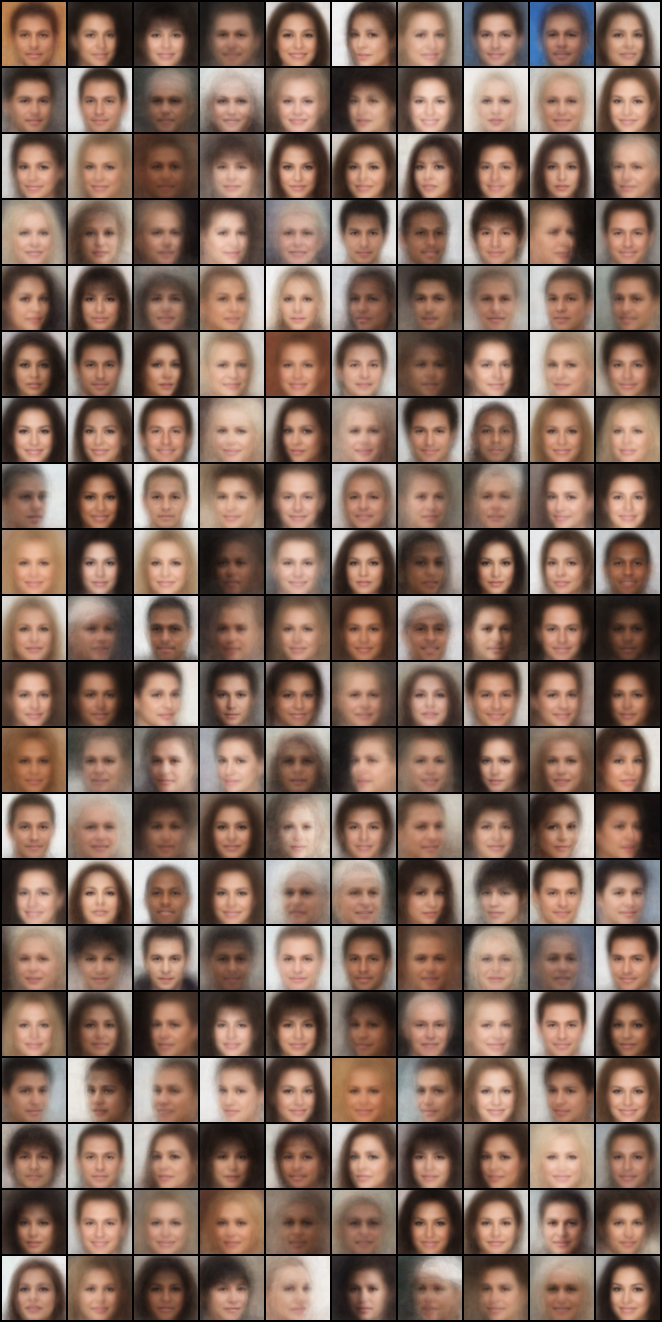

In [5]:
def printImgs(imgs, nrow=10, pig=True, padding=2, normalize=False, range=None, scale_each=False):
    grid = make_grid(imgs, nrow=nrow, padding=padding, normalize=normalize, range=range, scale_each=scale_each)
    if pig:
        return transforms.ToPILImage()(grid)
    else:
        plt.imshow(grid.transpose(0, 1).transpose(1, 2).numpy(), aspect=1, interpolation='none')
        plt.axis('off')
        
X = all_imgs.view(20000, -1).numpy()
kmeans = KMeans(n_clusters=200, n_jobs=12)
y = kmeans.fit_predict(X)
centers = torch.from_numpy(kmeans.cluster_centers_).view(-1, 3, 64, 64).float()
printImgs(centers)